In [2]:
import pandas as pd

In [3]:
base_test = "data/test.csv"
base_train = "data/train.csv"
test= pd.read_csv(base_test)
train = pd.read_csv(base_train)

In [4]:
test['Cabin'] = test['Cabin'].fillna('No asignado')
train['Cabin'] = train['Cabin'].fillna('No asignado')

**Imputacion de datos faltantes**

In [5]:
# LIMPIEZA DEL DATAFRAME 'train'

# Imputar 'Age' (Edad) con la Mediana
mediana_age_train = train['Age'].median()
train['Age'] = train['Age'].fillna(mediana_age_train)

In [6]:
# 2.2. Imputar 'Embarked' con la Moda (para variables categoricas)
moda_embarked_train = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(moda_embarked_train)

In [7]:
# LIMPIEZA DEL DATAFRAME 'test'

# Imputar 'Age'con la Mediana
mediana_age_test = test['Age'].median()
test['Age'] = test['Age'].fillna(mediana_age_test)

In [8]:
# Imputar 'Fare' con la Media (solo tiene un valor faltante)
media_fare_test = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(media_fare_test)

**Eliminación de Filas Duplicadas**

In [9]:
# Eliminar filas duplicadas exactas
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [10]:
print(" Verificación de valores faltantes después de la limpieza ")
print("Train limpio:")
print(train.isnull().sum())
print("\nTest limpio:")
print(test.isnull().sum())

 Verificación de valores faltantes después de la limpieza 
Train limpio:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Test limpio:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**2**
survival: Es una variable nominal que tiene dos posibles resultados(0=no,1=si) y muestra quines sobreviviron al Titanic.

pclass: La variable pclass es categorica y es una manera de determinar el estado socioeconomico de el pasajero, mediante el valor del ticket que se divide en tres categorias (1st=Alto, 2nd=Medio, 3rd=Bajo)

sex: Es una variable categorica, que divide a los pasajeros en dos (Male, Female) que se refiere al sexo masculino y femenino.

Age: Es una variable numerica, que dictamina la edad del pasajero

sibsp: Es la cantidad de familiares que hiban abordo, en el sentido de la relacion familiar (silbing =hermano, hermana, hermanastro o hermanatra y spouse = esposo o esposa(ignorando amantes y prometidos))

parch: Es el numero de pafres e hijos que hiban abordo (Parent = mother, father, child= hijo,hija, hijo adoptivo o hija adoptiva) alguno niños viajaron con una niñera (parch=0)

ticket = Es el numero del tiquete, hay que tener en cuenta que todos los pasajeros cuentan con un numero de tiquete unico

fare = la tarifa del pasajero

cabin = el numero de la cabina

embarked= puerto de partida (C=Cherbourg, Q=Queenstown, S=Southampton)

In [11]:
#3
#Data frame train
display(train.describe())

#Data frame test
display(test.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
#8
#a
promedio_edad = train['Age'].mean()
print(promedio_edad)

#b
conteo = train['Survived'].value_counts()

print("Fallecidos:", conteo[0])
print("Sobrevivientes:", conteo[1])

#c
primera_clase = train[train['Pclass'] == 1]
tarifa_promedio = primera_clase['Fare'].mean()
print("Tarifa promedio de primera clase:", tarifa_promedio)

#d
familiares = train[(train['SibSp'] > 0) | (train['Parch'] > 0)]
num_con_familiares = len(familiares)

print("Pasajeros con familiares a bordo:", num_con_familiares)

#e
edad_min = train['Age'].min()
edad_max = train['Age'].max()

print("Edad más joven:", edad_min)
print("Edad más vieja:", edad_max)

#f
puertos = train['Embarked'].value_counts()
print("Pasajeros por puerto de embarque:")
display(puertos)

#g
train['Familiares'] = train['SibSp'] + train['Parch']

# 4. Contar quiénes viajaron solos y quiénes con familiares
viajaron_solos = len(train[train['Familiares'] == 0])
viajaron_con_familia = len(train[train['Familiares'] > 0])

print("Pasajeros que viajaron solos:", viajaron_solos)
print("Pasajeros que viajaron con familiares:", viajaron_con_familia)

29.36158249158249
Fallecidos: 549
Sobrevivientes: 342
Tarifa promedio de primera clase: 84.1546875
Pasajeros con familiares a bordo: 354
Edad más joven: 0.42
Edad más vieja: 80.0
Pasajeros por puerto de embarque:


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Pasajeros que viajaron solos: 537
Pasajeros que viajaron con familiares: 354


In [13]:
# Analisis Estadistico inicial
# 4
train['Familiares'] = train['SibSp'] + train['Parch']
test['Familiares'] = test['SibSp'] + test['Parch']

print("Dataframe 'train' con la nueva columna 'Familiares'")
print("Se muestran las primeras 5 filas con todas las columnas:")
print(train.head())

print("\n Dataframe 'test' con la nueva columna 'Familiares'")
print("Se muestran las primeras 5 filas con todas las columnas:")
print(test.head())

Dataframe 'train' con la nueva columna 'Familiares'
Se muestran las primeras 5 filas con todas las columnas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare        Cabin Embarked  Familiares  
0      0         A/5 21171   7.2500  No asignado        S           1  
1      0          PC 17599  71.2833          C85        C          

In [14]:
# 5
train['source'] = 'train'
test['source'] = 'test'

combined_df = pd.concat([train, test], ignore_index=True)

# Verificación de la Fusión
print("Verificación del DataFrame Combinado")
print(f"Filas totales del nuevo DataFrame (891 + 418): {len(combined_df)}")
print("\nConteo de filas por origen:")
print(combined_df['source'].value_counts())
print("\nÚltimas filas (de 'test') mostrando 'Survived' como nulo:")
print(combined_df[['Survived', 'source', 'Familiares']].tail())

Verificación del DataFrame Combinado
Filas totales del nuevo DataFrame (891 + 418): 1309

Conteo de filas por origen:
source
train    891
test     418
Name: count, dtype: int64

Últimas filas (de 'test') mostrando 'Survived' como nulo:
      Survived source  Familiares
1304       NaN   test           0
1305       NaN   test           0
1306       NaN   test           0
1307       NaN   test           0
1308       NaN   test           2


In [15]:
# 7
# encontrar lo espacios en blanco
espacio_en_blanco = combined_df.isnull().sum()
espacio_en_blanco

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Familiares       0
source           0
dtype: int64

In [16]:
# 10
bins = [-1, 0, 3, combined_df['Familiares'].max()]
labels = ['1. Sin Familiares', '2. Familia Pequeña', '3. Familia Grande']

combined_df['GrupoFamiliar'] = pd.cut(combined_df['Familiares'], bins=bins, labels=labels)

print("La columna 'GrupoFamiliar' se ha creado con éxito.")
print(combined_df[['Familiares', 'GrupoFamiliar']].head(10))

combined_df['Tiene_Cabina'] = combined_df['Cabin'].notna().astype(int)

# Calcular la distribución de cabinas por grupo familiar
cabin_distribution = combined_df.groupby('GrupoFamiliar', observed=True)['Tiene_Cabina'].agg(['count', 'mean']).reset_index()
cabin_distribution.columns = ['Grupo Familiar', 'Total Pasajeros', 'Proporción con Cabina']
cabin_distribution['Proporción con Cabina (%)'] = (cabin_distribution['Proporción con Cabina'] * 100).round(1)

print("\n Distribución de Cabinas por Grupo Familiar")
print(cabin_distribution[['Grupo Familiar', 'Total Pasajeros', 'Proporción con Cabina (%)']])

La columna 'GrupoFamiliar' se ha creado con éxito.
   Familiares       GrupoFamiliar
0           1  2. Familia Pequeña
1           1  2. Familia Pequeña
2           0   1. Sin Familiares
3           1  2. Familia Pequeña
4           0   1. Sin Familiares
5           0   1. Sin Familiares
6           0   1. Sin Familiares
7           4   3. Familia Grande
8           2  2. Familia Pequeña
9           1  2. Familia Pequeña

 Distribución de Cabinas por Grupo Familiar
       Grupo Familiar  Total Pasajeros  Proporción con Cabina (%)
0   1. Sin Familiares              790                      100.0
1  2. Familia Pequeña              437                      100.0
2   3. Familia Grande               82                      100.0


In [17]:
# 11
def grupo_etario(Age):
    if Age <18 and Age>=0:
        return 'Menor de edad'
    elif Age >= 18 and Age <50:
        return 'Adulto'
    elif Age>=50:
        return 'Mayores'
    else:
      return "No clasificado"

train['Grupo_etario'] = train['Age'].map(grupo_etario)
display(train)

# 1. Agrupar por Grupo etario y Sex
conteo_por_sexo_y_edad = train.groupby(['Grupo_etario', 'Sex']).size().reset_index(name='Total_Personas')

print("\n Conteo de Hombres y Mujeres por Grupo Etario ")
print(conteo_por_sexo_y_edad)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares,source,Grupo_etario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No asignado,S,1,train,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,train,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No asignado,S,0,train,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,train,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No asignado,S,0,train,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,No asignado,S,0,train,Adulto
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,train,Adulto
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,No asignado,S,3,train,Adulto
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,train,Adulto



 Conteo de Hombres y Mujeres por Grupo Etario 
    Grupo_etario     Sex  Total_Personas
0         Adulto  female             237
1         Adulto    male             467
2        Mayores  female              22
3        Mayores    male              52
4  Menor de edad  female              55
5  Menor de edad    male              58


In [18]:
# 6
print("Estadísticas Descriptivas\n")
print(combined_df.describe(include='all').T)

# Resumen de datos faltantes
print("\nConteo de Valores Nulos")
print(combined_df.isnull().sum())

Estadísticas Descriptivas

                count unique                   top  freq       mean  \
PassengerId    1309.0    NaN                   NaN   NaN      655.0   
Survived        891.0    NaN                   NaN   NaN   0.383838   
Pclass         1309.0    NaN                   NaN   NaN   2.294882   
Name             1309   1307  Connolly, Miss. Kate     2        NaN   
Sex              1309      2                  male   843        NaN   
Age            1309.0    NaN                   NaN   NaN  29.437487   
SibSp          1309.0    NaN                   NaN   NaN   0.498854   
Parch          1309.0    NaN                   NaN   NaN   0.385027   
Ticket           1309    929              CA. 2343    11        NaN   
Fare           1309.0    NaN                   NaN   NaN  33.297261   
Cabin            1309    187           No asignado  1014        NaN   
Embarked         1309      3                     S   916        NaN   
Familiares     1309.0    NaN                   NaN

In [19]:
# 9
sobrev_por_sexo = train.groupby('Sex')['Survived'].sum()
tasa_sobrev_por_sexo = train.groupby('Sex')['Survived'].mean()

print("Conteo de sobrevivientes por sexo:")
display(sobrev_por_sexo)
print("\nTasa de supervivencia por sexo:")
display(tasa_sobrev_por_sexo)

Conteo de sobrevivientes por sexo:


Sex
female    233
male      109
Name: Survived, dtype: int64


Tasa de supervivencia por sexo:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

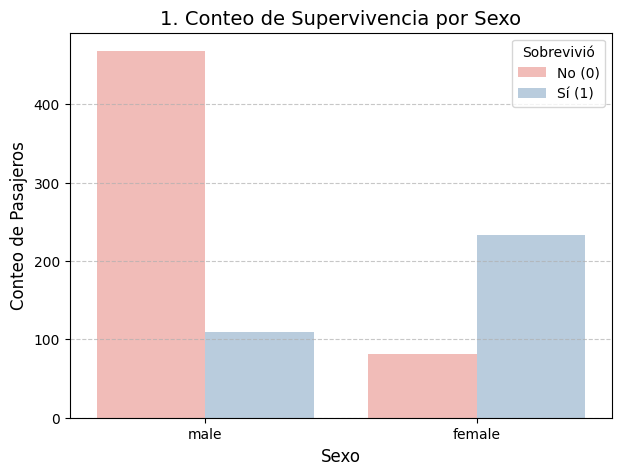

In [21]:
#12
#1. Supervivencia por Sexo
import seaborn as sns
import matplotlib.pyplot as plt

train_subset = train[train['Survived'].notna()].copy()
train_subset['Survived'] = train_subset['Survived'].astype(int)

plt.figure(figsize=(7, 5))
sns.countplot(x='Sex', hue='Survived', data=train_subset, palette='Pastel1')

plt.title('1. Conteo de Supervivencia por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Conteo de Pasajeros', fontsize=12)
plt.legend(title='Sobrevivió', labels=['No (0)', 'Sí (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\juanz\AppData\Local\Temp\ipykernel_10452\1407925132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_subset, palette='rocket')


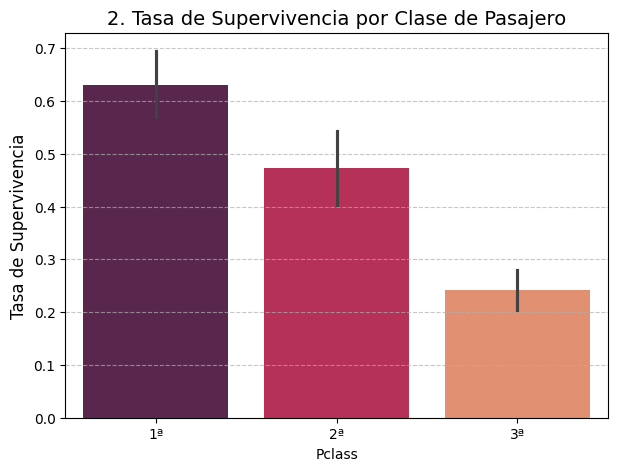

In [22]:
# 2. Tasa de Supervivencia por Clase (Gráfico de Proporción)
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=train_subset, palette='rocket')

plt.title('2. Tasa de Supervivencia por Clase de Pasajero', fontsize=14)
plt.ylabel('Tasa de Supervivencia', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['1ª', '2ª', '3ª'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\juanz\AppData\Local\Temp\ipykernel_10452\668125753.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo_etario', y='Survived', data=train_subset, palette='mako',


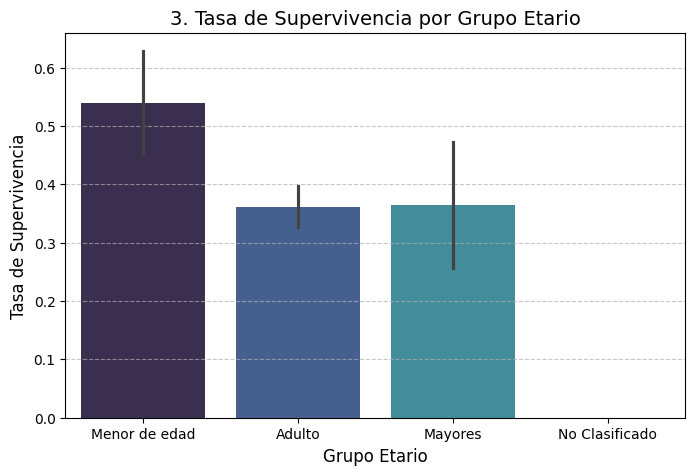

In [23]:
#3. Tasa de Supervivencia por Grupo Etario (Gráfico de Proporción)
def grupo_etario(Age):
    if Age < 18 and Age >= 0:
        return 'Menor de edad'
    elif Age >= 18 and Age < 50:
        return 'Adulto'
    elif Age >= 50:
        return 'Mayores'
    else:
        return 'No Clasificado'

train_subset['Grupo_etario'] = train_subset['Age'].map(grupo_etario)

plt.figure(figsize=(8, 5))
# tasa media de Supervivencia para cada grupo
sns.barplot(x='Grupo_etario', y='Survived', data=train_subset, palette='mako',
            order=['Menor de edad', 'Adulto', 'Mayores', 'No Clasificado'])

plt.title('3. Tasa de Supervivencia por Grupo Etario', fontsize=14)
plt.xlabel('Grupo Etario', fontsize=12)
plt.ylabel('Tasa de Supervivencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

13.
La supervivencia estaba determinada por una clara jerarquía basada en la regla de "mujeres y niños primero" y el privilegio de la clase social.

Los pasajeros con mayor probabilidad de sobrevivir eran:

Mujeres: El factor más decisivo, con una tasa de supervivencia cercana al $74%
Niños (Menores de 10 años): Se les dio alta prioridad, con tasas muy superiores al promedio de los hombres adultos.

Pasajeros de Primera Clase: Su estatus social y la ubicación de su cabina cerca de la cubierta de botes les proporcionó una ventaja clave, con tasas de supervivencia de aproximadamente el 63%

En resumen, una Mujer, preferiblemente de Primera Clase, tenía la mejor oportunidad de ser rescatada.